# Testing Informativeness and Headship with TFIDF and Fisher's

In [1]:
from scripts.imports import *

df_ph = pd.read_csv(paths['phrase_dataset'], index_col='node', low_memory=False)

df_sgph = df_ph[
    (df_ph.n_heads == 1)
    & (df_ph.n_phatoms == 1)
].copy()

out = Exporter(
    paths['outdir'], 
    'headship_tfidf'
)

import ast

In [2]:
df_sgph.head()

verse     book booksuper canon_part period heads_etcbc  \
node                                                                   
651542  Genesis 1:1  Genesis   Genesis        Law    SBH      R>CJT/   
651544  Genesis 1:1  Genesis   Genesis        Law    SBH      >LHJM/   
651547  Genesis 1:2  Genesis   Genesis        Law    SBH        >RY/   
651551  Genesis 1:2  Genesis   Genesis        Law    SBH        XCK/   
651552  Genesis 1:2  Genesis   Genesis        Law    SBH       THWM/   

       heads_utf8 heads_utf8d heads_POS        Phrase Heads  ... QUANT SFX1  \
node                                                         ...              
651542     ראשׁית       תישאר      NOUN  \texthebrew{ראשית}  ...   0.0  0.0   
651544      אלהים       םיהלא      NOUN  \texthebrew{אלהים}  ...   0.0  0.0   
651547        ארץ         ץרא      NOUN    \texthebrew{ארץ}  ...   0.0  0.0   
651551       חשׁך         ךשח      NOUN    \texthebrew{חשך}  ...   0.0  0.0   
651552       תהום        םוהת      NOUN   \texthebrew{תהום}  ...   0.0  0.0   

       SFX2  ORDN   DU  CARDC  DEMON  HLOC TIMEAPPO ADVB  
node                                                      
651542  0.0   0.0  0.0    0.0    0.0   0.0      0.0  0.0  
651544  0.0   0.0  0.0    0.0    0.0   0.0      0.0  0.0  
651547  0.0   0.0  0.0    0.0    0.0   0.0      0.0  0.0  
651551  0.0   0.0  0.0    0.0    0.0   0.0      0.0  0.0  
651552  0.0   0.0  0.0    0.0    0.0   0.0      0.0  0.0  

[5 rows x 58 columns]

In [3]:
df_sgph.shape

(100021, 58)

In [4]:
df_sgph.columns

Index(['verse', 'book', 'booksuper', 'canon_part', 'period', 'heads_etcbc',
       'heads_utf8', 'heads_utf8d', 'heads_POS', 'Phrase Heads', 'function',
       'text', 'types', 'n_heads', 'word_lexs', 'n_words', 'n_phatoms',
       'clause_node', 'firstw', 'genre', 'domain', 'gendom', 'clause',
       'sentence', 'cl_rela', 'cl_type', 'cl_kind', 'verb', 'verb_etcbc',
       'verb_utf8', 'verb_text', 'verbform', 'verb_stem', 'cl_type2', 'PP',
       'unmodified', 'PL', 'ØPP', 'PARA', 'DEF', 'GP', 'main_genre', 'NUM',
       'SPEC', 'ADJV', 'SFX3', 'SFX', 'APPO', 'QUANT', 'SFX1', 'SFX2', 'ORDN',
       'DU', 'CARDC', 'DEMON', 'HLOC', 'TIMEAPPO', 'ADVB'],
      dtype='object')

# ΔP Test

In [25]:
head_funct_ct = pivot_ct(
    df_sgph,
    'function',
    'heads_etcbc',
)

head_funct_ct.drop(['Spec', 'Modi'], axis=0, inplace=True)

print(head_funct_ct.shape)

head_funct_ct.head()

(7, 4907)


heads_etcbc     L  JHWH/  BN/  JWM/  >RY/    >T    >L  >JC/    <L     B  ...  \
function                                                                 ...   
Cmpl         3181    701  325    36   726     8  1562   184  1265  1005  ...   
Subj            0   2067  757   184   224     8     0   871     0     0  ...   
Objc            0    180  268    84   306  1602     0   187     0     0  ...   
PreC          637    222  301    74   130     7    52   133   125   187  ...   
Adju          273    151  107    41    47     4     7   104    72   103  ...   

heads_etcbc  MC>RT/  MCK[  MC>WN/  MCBT/  MCGH/  MCH/  MCJ/  MCK=/  MCKWT/  \
function                                                                     
Cmpl              0     1       1      1      0     0     0      1       0   
Subj              1     0       0      0      0     0     0      0       0   
Objc              0     0       0      0      0     1     1      0       1   
PreC              0     0       0      0      1     0     0      0       0   
Adju              0     0       0      0      0     0     0      0       0   

heads_etcbc  ZWZJM/  
function             
Cmpl              0  
Subj              0  
Objc              1  
PreC              0  
Adju              0  

[5 rows x 4907 columns]

In [26]:
head_funct_dp = sig.apply_deltaP(head_funct_ct, 0, 1)

head_funct_dp.head()

heads_etcbc         L     JHWH/       BN/      JWM/      >RY/        >T  \
function                                                                  
Cmpl         0.106205 -0.011542 -0.008432 -0.022492  0.013925 -0.022926   
Subj        -0.058289  0.060618  0.014504 -0.014578 -0.011830 -0.022780   
Objc        -0.052582 -0.030943 -0.004828 -0.016250 -0.000886  0.085676   
PreC         0.015966 -0.016908  0.009540 -0.012518 -0.006351 -0.018417   
Adju        -0.009312 -0.017334 -0.005457 -0.013674 -0.012341 -0.017884   

heads_etcbc        >L      >JC/        <L         B  ...    MC>RT/      MCK[  \
function                                             ...                       
Cmpl         0.057722 -0.011656  0.044580  0.033370  ... -0.000014  0.000037   
Subj        -0.023085  0.024530 -0.020849 -0.018599  ...  0.000038 -0.000014   
Objc        -0.020825 -0.006557 -0.018808 -0.016778  ... -0.000013 -0.000013   
PreC        -0.013802 -0.003996 -0.004624  0.003461  ... -0.000012 -0.000012   
Adju        -0.017387 -0.002640 -0.006805 -0.000819  ... -0.000011 -0.000011   

heads_etcbc    MC>WN/     MCBT/     MCGH/      MCH/      MCJ/     MCK=/  \
function                                                                  
Cmpl         0.000037  0.000037 -0.000014 -0.000014 -0.000014  0.000037   
Subj        -0.000014 -0.000014 -0.000014 -0.000014 -0.000014 -0.000014   
Objc        -0.000013 -0.000013 -0.000013  0.000054  0.000054 -0.000013   
PreC        -0.000012 -0.000012  0.000089 -0.000012 -0.000012 -0.000012   
Adju        -0.000011 -0.000011 -0.000011 -0.000011 -0.000011 -0.000011   

heads_etcbc    MCKWT/    ZWZJM/  
function                         
Cmpl        -0.000014 -0.000014  
Subj        -0.000014 -0.000014  
Objc         0.000054  0.000054  
PreC        -0.000012 -0.000012  
Adju        -0.000011 -0.000011  

[5 rows x 4907 columns]

# Extract the wordcounts per phrase

In [5]:
df_sgph['word_lexs'].head() # show a sample

node
651542         B R>CJT/
651544           >LHJM/
651547           H >RY/
651551             XCK/
651552    <L PNH/ THWM/
Name: word_lexs, dtype: object

In [65]:
exp_df = df_sgph[df_sgph.n_words > 1]
exp_df = exp_df.set_index('function', append=True)
exp_df

verse          book   booksuper canon_part  \
node   function                                                            
651542 Time             Genesis 1:1       Genesis     Genesis        Law   
651547 Subj             Genesis 1:2       Genesis     Genesis        Law   
651552 PreC             Genesis 1:2       Genesis     Genesis        Law   
651554 Subj             Genesis 1:2       Genesis     Genesis        Law   
651556 Cmpl             Genesis 1:2       Genesis     Genesis        Law   
...                             ...           ...         ...        ...   
904724 Adju      2_Chronicles 36:22  2_Chronicles  Chronicles   Writings   
904729 Objc      2_Chronicles 36:23  2_Chronicles  Chronicles   Writings   
904740 Loca      2_Chronicles 36:23  2_Chronicles  Chronicles   Writings   
904742 PreC      2_Chronicles 36:23  2_Chronicles  Chronicles   Writings   
904744 PreC      2_Chronicles 36:23  2_Chronicles  Chronicles   Writings   

                period heads_etcbc heads_utf8 heads_utf8d heads_POS  \
node   function                                                       
651542 Time        SBH      R>CJT/     ראשׁית       תישאר      NOUN   
651547 Subj        SBH        >RY/        ארץ         ץרא      NOUN   
651552 PreC        SBH       THWM/       תהום        םוהת      NOUN   
651554 Subj        SBH        RWX/        רוח         חור      NOUN   
651556 Cmpl        SBH        MJM/        מים         םימ      NOUN   
...                ...         ...        ...         ...       ...   
904724 Adju        LBH       MKTB/       מכתב        בתכמ      NOUN   
904729 Objc        LBH      MMLKH/      ממלכה       הכלממ      NOUN   
904740 Loca        LBH     JRWCLM/    ירושׁלם      םלשורי     PROPN   
904742 PreC        LBH      JHWDH/      יהודה       הדוהי     PROPN   
904744 PreC        LBH         <M/         עם          םע      NOUN   

                        Phrase Heads  ... QUANT SFX1  SFX2 ORDN   DU  CARDC  \
node   function                       ...                                     
651542 Time       \texthebrew{ראשית}  ...   0.0  0.0   0.0  0.0  0.0    0.0   
651547 Subj         \texthebrew{ארץ}  ...   0.0  0.0   0.0  0.0  0.0    0.0   
651552 PreC        \texthebrew{תהום}  ...   0.0  0.0   0.0  0.0  0.0    0.0   
651554 Subj         \texthebrew{רוח}  ...   0.0  0.0   0.0  0.0  0.0    0.0   
651556 Cmpl         \texthebrew{מים}  ...   0.0  0.0   0.0  0.0  0.0    0.0   
...                              ...  ...   ...  ...   ...  ...  ...    ...   
904724 Adju        \texthebrew{מכתב}  ...   0.0  0.0   0.0  0.0  0.0    0.0   
904729 Objc       \texthebrew{ממלכה}  ...   1.0  0.0   0.0  0.0  0.0    0.0   
904740 Loca      \texthebrew{ירושלם}  ...   0.0  0.0   0.0  0.0  0.0    0.0   
904742 PreC       \texthebrew{יהודה}  ...   0.0  0.0   0.0  0.0  0.0    0.0   
904744 PreC          \texthebrew{עם}  ...   1.0  0.0   0.0  0.0  0.0    0.0   

                 DEMON HLOC TIMEAPPO ADVB  
node   function                            
651542 Time        0.0  0.0      0.0  0.0  
651547 Subj        0.0  0.0      0.0  0.0  
651552 PreC        0.0  0.0      0.0  0.0  
651554 Subj        0.0  0.0      0.0  0.0  
651556 Cmpl        0.0  0.0      0.0  0.0  
...                ...  ...      ...  ...  
904724 Adju        0.0  0.0      0.0  0.0  
904729 Objc        0.0  0.0      0.0  0.0  
904740 Loca        0.0  0.0      0.0  0.0  
904742 PreC        0.0  0.0      0.0  0.0  
904744 PreC        0.0  0.0      0.0  0.0  

[53734 rows x 57 columns]

In [66]:
# first we do a split operation on the lexeme string 
# since lexemes are space-separated in dataset;
# expand ensures that each lexeme goes into its own column

split_words = (
    exp_df['word_lexs']
        .str.split(expand=True)
)

print(split_words.shape)

split_words.head()

(53734, 22)


0       1      2     3     4     5     6     7     8   \
node   function                                                            
651542 Time         B  R>CJT/   None  None  None  None  None  None  None   
651547 Subj         H    >RY/   None  None  None  None  None  None  None   
651552 PreC        <L    PNH/  THWM/  None  None  None  None  None  None   
651554 Subj      RWX/  >LHJM/   None  None  None  None  None  None  None   
651556 Cmpl        <L    PNH/      H  MJM/  None  None  None  None  None   

                   9   ...    12    13    14    15    16    17    18    19  \
node   function        ...                                                   
651542 Time      None  ...  None  None  None  None  None  None  None  None   
651547 Subj      None  ...  None  None  None  None  None  None  None  None   
651552 PreC      None  ...  None  None  None  None  None  None  None  None   
651554 Subj      None  ...  None  None  None  None  None  None  None  None   
651556 Cmpl      None  ...  None  None  None  None  None  None  None  None   

                   20    21  
node   function              
651542 Time      None  None  
651547 Subj      None  None  
651552 PreC      None  None  
651554 Subj      None  None  
651556 Cmpl      None  None  

[5 rows x 22 columns]

In [67]:
# now use a stack operation to move all columns into
# a single column, grouped by the node index;
# this creates a mult-index

stacked_words = split_words.stack()

stacked_words.index[:5] # show the multi-index

MultiIndex([(651542, 'Time', 0),
            (651542, 'Time', 1),
            (651547, 'Subj', 0),
            (651547, 'Subj', 1),
            (651552, 'PreC', 0)],
           names=['node', 'function', None])

In [68]:
# show the stacked words
stacked_words.head()

node    function   
651542  Time      0         B
                  1    R>CJT/
651547  Subj      0         H
                  1      >RY/
651552  PreC      0        <L
dtype: object

In [69]:
# finally, do a groupby operation to group the whole dataframe
# by the node number; we use value_counts as the grouping function
# in order to retrieve a count of lexemes
word_cts = stacked_words.groupby(by=['node', 'function'], level=0).value_counts()
word_cts.head()

node    function        
651542  Time      B         1
                  R>CJT/    1
651547  Subj      >RY/      1
                  H         1
651552  PreC      <L        1
dtype: int64

In [74]:
word_cts.index

MultiIndex([(651542, 'Time',       'B'),
            (651542, 'Time',  'R>CJT/'),
            (651547, 'Subj',    '>RY/'),
            (651547, 'Subj',       'H'),
            (651552, 'PreC',      '<L'),
            (651552, 'PreC',    'PNH/'),
            (651552, 'PreC',   'THWM/'),
            (651554, 'Subj',  '>LHJM/'),
            (651554, 'Subj',    'RWX/'),
            (651556, 'Cmpl',      '<L'),
            ...
            (904729, 'Objc',       'H'),
            (904729, 'Objc',     'KL/'),
            (904729, 'Objc',  'MMLKH/'),
            (904740, 'Loca',       'B'),
            (904740, 'Loca', 'JRWCLM/'),
            (904742, 'PreC',       'B'),
            (904742, 'PreC',  'JHWDH/'),
            (904744, 'PreC',     '<M/'),
            (904744, 'PreC',     'KL/'),
            (904744, 'PreC',      'MN')],
           names=['node', 'function', None], length=140943)

In [53]:
word_cts[word_cts > 1][20:25] # show items with count > 1

node    function      
654554  PreC      CNH/    2
654590  Objc      H       2
655034  PreC      B>R/    2
655185  Adju      H       2
655281  Objc      H       2
dtype: int64

In [54]:
# # total N words per phrase
# nwords = word_cts.groupby(by='node', level=0).sum()

# # divide to get the relative frequency (percentage)
# rel_freqs = word_cts.div(nwords)
# rel_freqs

In [57]:
# re-organize into a DF
word_ct = (
    word_cts
        .reset_index()
        .pivot(index=['node'], columns='level_1', values=0)
        .fillna(0)
)

word_ct.head()

KeyError: 'level_1'

In [13]:
# now we can apply TFIDF to the data;

# first we calculate the term (relative) frequency (TF)
tf = word_ct.div(word_ct.sum(1), 0)

# next get number of phrases each term appears in;
# turn all counts into binary 0/1 value 
# and then sum across rows
n_in_ph = ((word_ct > 0) * 1).sum()

# get inverse document frequency
idf = np.log10(n_in_ph.shape[0] / n_in_ph)

# now tf-idf matrix
tfidf = tf.multiply(idf)

<AxesSubplot:xlabel='level_1'>

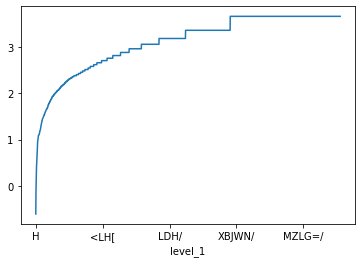

In [14]:
# plot idf scores
idf.sort_values().plot()

In [15]:
tfidf

level_1  <B/  <B=/  <B==/  <BD/  <BDH/  <BDJH/  <BDJHW/  <BDT/  <BD[  \
node                                                                   
651542   0.0   0.0    0.0   0.0    0.0     0.0      0.0    0.0   0.0   
651547   0.0   0.0    0.0   0.0    0.0     0.0      0.0    0.0   0.0   
651552   0.0   0.0    0.0   0.0    0.0     0.0      0.0    0.0   0.0   
651554   0.0   0.0    0.0   0.0    0.0     0.0      0.0    0.0   0.0   
651556   0.0   0.0    0.0   0.0    0.0     0.0      0.0    0.0   0.0   
...      ...   ...    ...   ...    ...     ...      ...    ...   ...   
904724   0.0   0.0    0.0   0.0    0.0     0.0      0.0    0.0   0.0   
904729   0.0   0.0    0.0   0.0    0.0     0.0      0.0    0.0   0.0   
904740   0.0   0.0    0.0   0.0    0.0     0.0      0.0    0.0   0.0   
904742   0.0   0.0    0.0   0.0    0.0     0.0      0.0    0.0   0.0   
904744   0.0   0.0    0.0   0.0    0.0     0.0      0.0    0.0   0.0   

level_1  <BD_>DWM/  ...  ZRZJR/  ZTW>/  ZW/  ZWB/  ZWB[  ZWJT/  ZWLH/  ZWZJM/  \
node                ...                                                         
651542         0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0    0.0     0.0   
651547         0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0    0.0     0.0   
651552         0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0    0.0     0.0   
651554         0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0    0.0     0.0   
651556         0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0    0.0     0.0   
...            ...  ...     ...    ...  ...   ...   ...    ...    ...     ...   
904724         0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0    0.0     0.0   
904729         0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0    0.0     0.0   
904740         0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0    0.0     0.0   
904742         0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0    0.0     0.0   
904744         0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0    0.0     0.0   

level_1  ZXLT/  ZXL[  
node                  
651542     0.0   0.0  
651547     0.0   0.0  
651552     0.0   0.0  
651554     0.0   0.0  
651556     0.0   0.0  
...        ...   ...  
904724     0.0   0.0  
904729     0.0   0.0  
904740     0.0   0.0  
904742     0.0   0.0  
904744     0.0   0.0  

[53734 rows x 4551 columns]

In [18]:
tfidf[
    (tfidf['JWM/'] > 0)
    & (tfidf['>XD/'] > 0)
][['JWM/', '>XD/']]

level_1      JWM/      >XD/
node                       
651590   0.221631  0.476549
660254   0.221631  0.476549
660274   0.221631  0.476549
660835   0.147754  0.317700
662830   0.221631  0.476549
690135   0.147754  0.317700
695736   0.221631  0.476549
704204   0.147754  0.317700
732434   0.147754  0.317700
734387   0.221631  0.476549
742393   0.221631  0.476549
755339   0.147754  0.317700
762671   0.147754  0.317700
776087   0.221631  0.476549
776391   0.147754  0.317700
778707   0.110816  0.238275
789112   0.147754  0.317700
828081   0.147754  0.317700
832387   0.147754  0.317700
834326   0.221631  0.476549
874668   0.147754  0.317700
875761   0.147754  0.317700
880406   0.110816  0.238275
880818   0.147754  0.317700
883537   0.147754  0.317700
884988   0.147754  0.317700
901750   0.147754  0.317700

In [16]:
# now get the index with the maximum value for tfidf;
# this is our prediction for the head-word based on the principle
# of informativity / heads as primary-information-bearing-unit
# we can use idxmax to do this:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmax.html
head_predict = tfidf.idxmax(1)

head_predict

node
651542     R>CJT/
651547       >RY/
651552      THWM/
651554       RWX/
651556       MJM/
           ...   
904724      MKTB/
904729     MMLKH/
904740    JRWCLM/
904742     JHWDH/
904744        <M/
Length: 53734, dtype: object

In [17]:
# Calculate the accuracy of the predicted head by comparing
# with the parsed head values

In [18]:
head_df = pd.concat([head_predict, exp_df.heads_etcbc], 1)\
              .set_axis(['predict_head', 'actual_head'], 1)\
              .assign(predict_tfidf=tfidf.max(1))\
              .assign(
                  correct=(1 * (head_predict == exp_df.heads_etcbc))
              )\
              .assign(n_words=exp_df.n_words)

head_df.head()

predict_head actual_head  predict_tfidf  correct  n_words
node                                                            
651542       R>CJT/      R>CJT/       1.097854        1        2
651547         >RY/        >RY/       0.203234        1        2
651552        THWM/       THWM/       0.817996        1        3
651554         RWX/        RWX/       0.649136        1        2
651556         MJM/        MJM/       0.277891        1        4

In [19]:
# finally, get the overall accuracy!

head_df.correct.sum() / head_df.correct.size

0.7559273458145681

Overall, the TFIDF method of informativeness predicts the correct head
76% of the time.

In [20]:
head_df[head_df.correct == 0].head(20)

predict_head actual_head  predict_tfidf  correct  n_words
node                                                            
651590         >XD/        JWM/       0.476549        0        2
651626         CNJ/        JWM/       0.826893        0        2
651695       CLJCJ/        JWM/       0.936389        0        2
651744       RBJ<J/        JWM/       1.063314        0        2
651796       XMJCJ/        JWM/       1.201417        0        2
651802          XJ/        NPC/       0.900387        0        2
651881         PNH/        >RY/       0.087600        0        5
651894          XJ/        NPC/       0.900387        0        2
651916         CCJ/        JWM/       0.771895        0        3
651923       CBJ<J/        JWM/       0.360155        0        5
651929       CBJ<J/        JWM/       0.360155        0        5
651936       CBJ<J/        JWM/       0.450194        0        4
651953       >LHJM/       JHWH/       0.349294        0        2
651967       >LHJM/       JHWH/       0.349294        0        2
651983       >LHJM/       JHWH/       0.349294        0        2
651993          XJ/        NPC/       0.600258        0        3
651996       >LHJM/       JHWH/       0.349294        0        2
652008       >LHJM/       JHWH/       0.349294        0        2
652017        XJJM/         <Y/       0.558612        0        3
652032        >RB</        R>C/       0.399070        0        3

In [21]:
head_df[head_df.correct == 0].head(20)

predict_head actual_head  predict_tfidf  correct  n_words
node                                                            
651590         >XD/        JWM/       0.476549        0        2
651626         CNJ/        JWM/       0.826893        0        2
651695       CLJCJ/        JWM/       0.936389        0        2
651744       RBJ<J/        JWM/       1.063314        0        2
651796       XMJCJ/        JWM/       1.201417        0        2
651802          XJ/        NPC/       0.900387        0        2
651881         PNH/        >RY/       0.087600        0        5
651894          XJ/        NPC/       0.900387        0        2
651916         CCJ/        JWM/       0.771895        0        3
651923       CBJ<J/        JWM/       0.360155        0        5
651929       CBJ<J/        JWM/       0.360155        0        5
651936       CBJ<J/        JWM/       0.450194        0        4
651953       >LHJM/       JHWH/       0.349294        0        2
651967       >LHJM/       JHWH/       0.349294        0        2
651983       >LHJM/       JHWH/       0.349294        0        2
651993          XJ/        NPC/       0.600258        0        3
651996       >LHJM/       JHWH/       0.349294        0        2
652008       >LHJM/       JHWH/       0.349294        0        2
652017        XJJM/         <Y/       0.558612        0        3
652032        >RB</        R>C/       0.399070        0        3

In [22]:
# look at accuracy by number of words in phrase

bynwords = pd.pivot_table(
    head_df,
    index='n_words',
    columns='correct',
    aggfunc='size',
    fill_value=0,
)

bynwords

correct     0      1
n_words             
2        4106  25395
3        4841  11775
4        2114   2466
5        1529    727
6         297    158
7         117     54
8          33     20
9          24     12
10         15      7
11         10      4
12          9      1
13          5      0
14          4      0
15          3      0
16          1      0
17          3      0
18          3      0
22          1      0

In [23]:
bynwords_pr = bynwords.div(bynwords.sum(1), 0)

bynwords_pr

correct         0         1
n_words                    
2        0.139182  0.860818
3        0.291346  0.708654
4        0.461572  0.538428
5        0.677748  0.322252
6        0.652747  0.347253
7        0.684211  0.315789
8        0.622642  0.377358
9        0.666667  0.333333
10       0.681818  0.318182
11       0.714286  0.285714
12       0.900000  0.100000
13       1.000000  0.000000
14       1.000000  0.000000
15       1.000000  0.000000
16       1.000000  0.000000
17       1.000000  0.000000
18       1.000000  0.000000
22       1.000000  0.000000

<AxesSubplot:xlabel='n_words'>

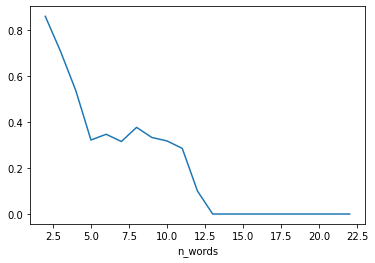

In [24]:
bynwords_pr[1].plot()